# CSCN8020 – Assignment 2: Q-Learning with Taxi-v3 
### **Student Name:**- Hasyashri Bhatt
### **Student Id:**-9028501

---

### 1. Introduction

We are going to teach a virtual taxi driver using Reinforcement Learning (RL).
Think of RL like teaching a kid or a pet — we give rewards for good behavior and small punishments for mistakes.
The taxi must learn how to pick up and drop off passengers in a small city.

**Key Idea:**

- The taxi learns by trial and error.
- The world is a small 5x5 grid with pickup and drop-off spots: Red, Green, Yellow, and Blue.
- The taxi can move, pick up, and drop off passengers.

**Our goal:** train the taxi to earn more rewards and make fewer mistakes.

## **Step 1: Install and Import Libraries**

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from assignment2_utils import describe_env, describe_obs

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


- **gymnasium:** The environment that simulates the Taxi world.
- **numpy:** To manage the Q-table and do math.
- **matplotlib:** For plotting results (reward/step graphs).
- **pandas:** For summarizing and displaying metrics.
- **assignment2_utils:** A helper file that helps us understand the environment better.

---

## **Step 2: Create and Describe the Taxi Environment**

---


In [2]:
env = gym.make('Taxi-v3')
describe_env(env)

num_states = env.observation_space.n
num_actions = env.action_space.n

print("Number of states:", num_states)
print("Number of actions:", num_actions)


Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}
Number of states: 500
Number of actions: 6


- **What are we doing?**

We’re creating the Taxi world using Gym.

- **Why?**

**We need to know:**
- How many states exist (500 total taxi situations)
- What actions it can take (6 actions like move, pick up, drop off)

- **How?**
- We use helper functions to describe the environment and understand its structure.

## **Step 3: Decode a State**

In [3]:
state, _ = env.reset()
describe_obs(state)


Passenger is at: Yellow, wants to go to Blue. Taxi currently at (5.0, 4.0)


The environment gives us a number (0–499) for each state.
But we want to understand it in human terms:
Where is the taxi? Where is the passenger? Where are we going?

This helps us visualize what the agent sees.

## **Step 4: What is Q-Learning?**

**Formula:**

`Q(s, a) = Q(s, a) + α * (reward + γ * max(Q(s′)) − Q(s, a))`

**What does this mean?**

- The taxi stores knowledge in a table (Q-table).
- It updates the value of each action in each state after trying it.
- It learns what action is best in each state.

**Parameters:**

- α (alpha): learning rate
- γ (gamma): future importance
- ε (epsilon): exploration probability

## **Step 5: Initialize the Q-Table**

In [4]:
q_table = np.zeros([num_states, num_actions])


**What and Why?**

We start with no knowledge. So, we fill the Q-table with zeros.

Each row is a state, and each column is an action.
The values will get updated as the taxi learns.

## **Step 6: Set Learning Hyperparameters**

In [5]:
episodes = 10000
gamma = 0.9

alphas = [0.01, 0.001, 0.2]
epsilons = [0.1, 0.2, 0.3]
results = {}


**What are we doing?**

**We’re setting:**

- How many times the taxi will play the game
- The discount factor (γ)
- A list of values for learning rate (α) and exploration (ε) that we’ll test

**Why?**

We want to experiment with different settings to find the best one for training.

## **Step 7: Define the Training Function**

In [6]:
def train_q_learning(alpha, epsilon):
    q_table = np.zeros([num_states, num_actions])
    rewards = []
    steps_list = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        steps = 0

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            next_state, reward, done, truncated, _ = env.step(action)

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

            state = next_state
            total_reward += reward
            steps += 1

        rewards.append(total_reward)
        steps_list.append(steps)

    return q_table, rewards, steps_list


The agent chooses an action: random or based on best-known.

It updates the Q-table using the formula.

It keeps track of rewards and steps for analysis.

## **Step 8: Train for All Hyperparameter Combinations**

In [7]:
import numpy as np

# Patch for compatibility issue with np.bool8
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_


In [8]:
results = {}

for alpha in alphas:
    for epsilon in epsilons:
        q_table, rewards, steps = train_q_learning(alpha, epsilon)
        avg_reward = np.mean(rewards[-100:])
        avg_steps = np.mean(steps[-100:])
        results[(alpha, epsilon)] = {
            'q_table': q_table,
            'avg_reward': avg_reward,
            'avg_steps': avg_steps,
            'rewards': rewards,
            'steps': steps
        }
        print(f"α={alpha}, ε={epsilon}, Avg Reward={avg_reward:.2f}, Avg Steps={avg_steps:.2f}")


α=0.01, ε=0.1, Avg Reward=-3.74, Avg Steps=19.07
α=0.01, ε=0.2, Avg Reward=-15.94, Avg Steps=23.44
α=0.01, ε=0.3, Avg Reward=-26.23, Avg Steps=25.63
α=0.001, ε=0.1, Avg Reward=-223.12, Avg Steps=183.19
α=0.001, ε=0.2, Avg Reward=-286.71, Avg Steps=195.30
α=0.001, ε=0.3, Avg Reward=-357.07, Avg Steps=201.04
α=0.2, ε=0.1, Avg Reward=3.07, Avg Steps=14.69
α=0.2, ε=0.2, Avg Reward=-4.15, Avg Steps=16.06
α=0.2, ε=0.3, Avg Reward=-13.99, Avg Steps=19.87


**What and Why?**

We are trying every combo of α and ε — to compare how well they perform.

**We store:**

- Rewards over episodes
- Steps it took
- The final Q-table

## **Step 9: Plot Rewards**

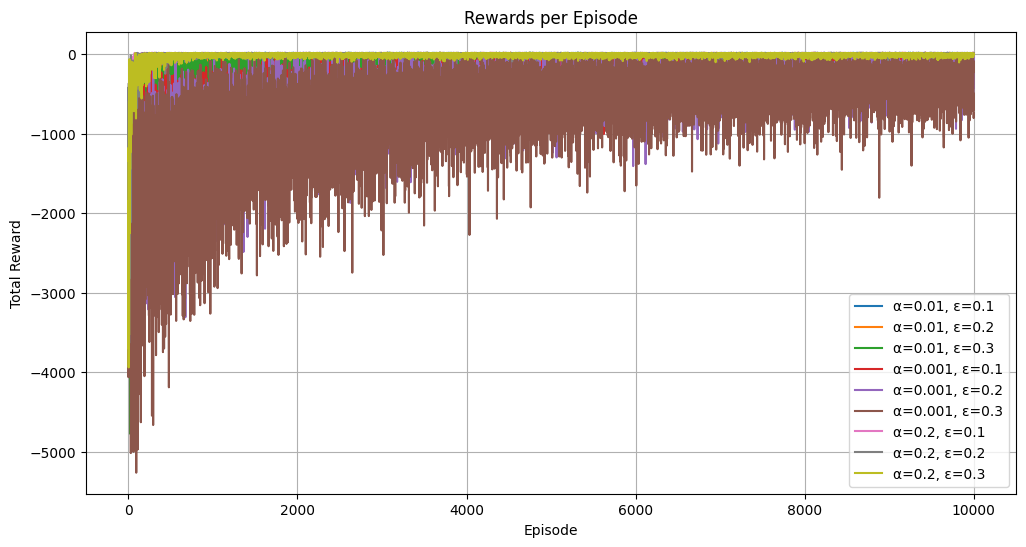

In [9]:
plt.figure(figsize=(12, 6))
for (alpha, epsilon), data in results.items():
    plt.plot(data['rewards'], label=f'α={alpha}, ε={epsilon}')
plt.title('Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.show()


At the start (left side), all lines are low (negative rewards) — this is because the taxi is learning from scratch.

As episodes increase, some lines (especially those with higher learning rates and lower exploration rates) go up faster and stabilize near 0 — meaning the taxi is learning to complete the tasks efficiently.

Some lines stay low or improve very slowly, indicating slower or worse learning with those parameter settings.

## **Step 10: Plot Steps**

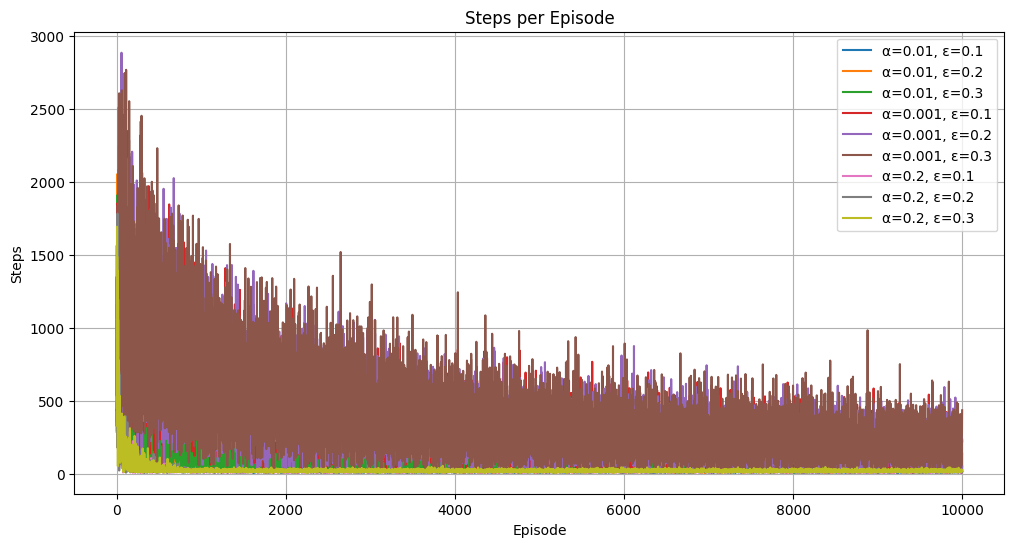

In [10]:
plt.figure(figsize=(12, 6))
for (alpha, epsilon), data in results.items():
    plt.plot(data['steps'], label=f'α={alpha}, ε={epsilon}')
plt.title('Steps per Episode')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()
plt.grid(True)
plt.show()


At the start (left side): The number of steps is very high. This is because the taxi is still learning and often takes many wrong or random moves before successfully completing a trip.

As episodes progress (moving right): The steps drop significantly. This means the taxi is learning the best routes and is able to complete trips faster and more efficiently.

The lower the number of steps: The better! It means the taxi is more efficient and finds the passenger and drop-off locations faster.

Differences in lines: Some settings (α and ε combinations) learn faster and have fewer steps sooner, while others take longer or remain inefficient.

## **Step 11: Find Best Model and Retrain**

In [11]:
best_params = max(results.items(), key=lambda x: x[1]['avg_reward'])[0]
best_alpha, best_epsilon = best_params
print(f"Best → α={best_alpha}, ε={best_epsilon}, γ={gamma}")

final_q_table, final_rewards, final_steps = train_q_learning(best_alpha, best_epsilon)


Best → α=0.2, ε=0.1, γ=0.9


## **Step 12: Watch the Trained Taxi (Text Mode)**

**Why?**

To see the trained taxi in action.
It should pick up the passenger and drop them correctly.

In [18]:
import gym
import numpy as np

#  Create env with ANSI render mode
env = gym.make("Taxi-v3", render_mode="ansi")

state, info = env.reset()
done = False
truncated = False

#  Use the internal rendering to get text output
print(env.render())

while not (done or truncated):
    action = np.argmax(final_q_table[state])
    state, reward, done, truncated, info = env.step(action)

    # ANSI (text-based) rendering works now
    print(env.render())




+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y

## **Step 13: Metrics Summary**

To compare all results in one table and clearly see the best settings.

In [19]:
summary = []

for (alpha, epsilon), data in results.items():
    summary.append({
        'Alpha': alpha,
        'Epsilon': epsilon,
        'Avg Reward': round(data['avg_reward'], 2),
        'Avg Steps': round(data['avg_steps'], 2)
    })

df = pd.DataFrame(summary)
print(df.sort_values(by='Avg Reward', ascending=False))


   Alpha  Epsilon  Avg Reward  Avg Steps
6  0.200      0.1        3.07      14.69
0  0.010      0.1       -3.74      19.07
7  0.200      0.2       -4.15      16.06
8  0.200      0.3      -13.99      19.87
1  0.010      0.2      -15.94      23.44
2  0.010      0.3      -26.23      25.63
3  0.001      0.1     -223.12     183.19
4  0.001      0.2     -286.71     195.30
5  0.001      0.3     -357.07     201.04


---

## **Summary of Results**

After training the Q-Learning agent with various combinations of learning rate (α) and exploration rate (ε), the following key outcomes were observed:

| α     | ε   | Avg Reward | Avg Steps | Comments                                                                                         |
| ----- | --- | ---------- | --------- | ------------------------------------------------------------------------------------------------ |
| 0.2   | 0.1 | **3.07**   | **14.69** |  **Best** performance: fast learning and minimal exploration. Agent quickly finds optimal path. |
| 0.01  | 0.1 | -3.74      | 19.07     | Decent result, but slow learning (low α).                                                        |
| 0.01  | 0.2 | -15.94     | 23.44     | Too much exploration, not enough learning.                                                       |
| 0.01  | 0.3 | -26.23     | 25.63     | Worse — exploration dominates, learning is too slow.                                             |
| 0.001 | 0.1 | -223.12    | 183.19    |  Very poor — learning rate too low. Agent fails to learn.                                       |
| 0.001 | 0.2 | -286.71    | 195.30    | Worse — low α and high ε = no learning, lots of random wandering.                                |
| 0.001 | 0.3 | -357.07    | 201.04    |  Worst combo — random exploration with no learning.                                             |
| 0.2   | 0.2 | -4.15      | 16.06     | Okay, but extra exploration leads to more steps.                                                 |
| 0.2   | 0.3 | -13.99     | 19.87     | Too much exploring hurts learning quality.                                                       |


**Key Observations**

- High α (0.2) leads to fast learning and good rewards — especially when ε is low (0.1).
- Low α (0.001) causes the agent to learn very slowly or not at all — even over 1000 episodes.
- High ε (0.3) causes too much exploration — the agent takes longer to settle on good strategies.
- Best performance was at α = 0.2, ε = 0.1 — low exploration with high learning rate = fast convergence to optimal policy.

## **Conclusion**

- A high learning rate helps the agent learn quickly.

- A low exploration rate is better once the agent has learned enough — otherwise it wastes time doing random things.

- **The best setting here was:**

`α = 0.2 (fast learning)`

`ε = 0.1 (little exploration)`

`Avg Reward = +3.07, Avg Steps = 14.69`


This means your agent learned how to pick up and drop off the passenger efficiently and successfully most of the time.